**Problem 5**: This problem serves as an empirical illustation of detrending. Visit [Federal Reserve Economic Data](https://fred.stlouisfed.org/). Download ”Consumer Price Index for All Urban Consumers: All Items, Index 1982-1984=100, Monthly, Seasonally Adjusted”
from January 1991 through December 1995 (n = 60 months). Call this series $\{y_t\}$. Detrend it by $y_t = \alpha + \delta \times t + u_t$ with $t \in \{1, . . . , 60\}$.1

(a) Report OLS estimates $\hat{\alpha_n}$ and $ \hat{\delta_n}$.  
(b) Draw a time series plot of actual series $y_t$, fitted series $y_t=\hat{\alpha_n} + \hat{\delta_n} \times t $  and detrended  series $ \hat{u_t} = y_t − \hat{y_t}$
in one figure. 
(c) Does $\{u_t\}$ seem to be stationary or nonstationary? Explain

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
sns.set_style('white')

In [2]:
cpi= pd.read_csv('CPIAUCSL.csv')
t=np.arange(1,len(cpi)+1).reshape(-1,1)
t=pd.DataFrame(t)
cpi=pd.concat([cpi,t],axis=1)
cpi['DATE'] = pd.to_datetime(cpi['DATE'],format='%Y-%m-%')
cpi.columns=['date','CPI','t']

In [10]:
ols5= LinearRegression()
ols5.fit(t,cpi['CPI'])
print('The intercept is %.3f' % ols5.intercept_)
print('The coefficient is %.4f' %ols5.coef_)

The intercept is 134.058
The coefficient is 0.3362


/Users/yoshikinakajima/anaconda/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [11]:
cpi['pred']= ols5.predict(t)
cpi['resid']= cpi['CPI'] - cpi['pred']
cpi.head()

,date,CPI,t,pred,resid
0,1991-01-01,134.7,1,134.394044,0.305956
1,1991-02-01,134.8,2,134.730234,0.069766
2,1991-03-01,134.8,3,135.066425,-0.266425
3,1991-04-01,135.1,4,135.402616,-0.302616
4,1991-05-01,135.6,5,135.738806,-0.138806


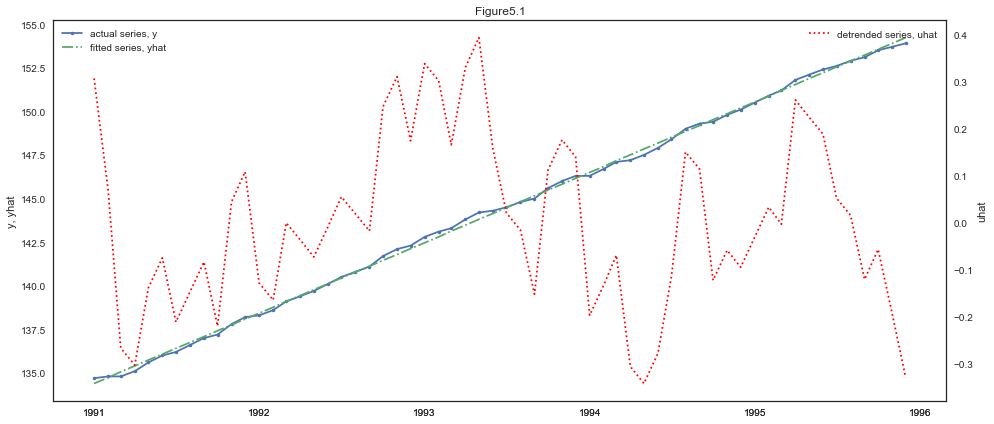

In [12]:
fig5=plt.figure(figsize=(16,7))
plt.title('Figure5.1')
ax1=plt.subplot(111)
obs=plt.plot(cpi.date,cpi.CPI,'.-',label='actual series, y')
pred=plt.plot(cpi.date,cpi.pred,'-.',label='fitted series, yhat')
plt.ylabel('y, yhat')
plt.legend()

ax2=fig5.add_subplot(111,sharex=ax1,frameon=False)
resid=ax2.plot(cpi.date,cpi.resid,':',label='detrended series, uhat',color='r')
plt.ylabel('uhat')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right')
plt.legend(loc='upper right')



plt.savefig('prob5b')
plt.show()

In [13]:
import statsmodels.tsa.stattools as ts
ts.adfuller(cpi['resid'],maxlag=12)

/Users/yoshikinakajima/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


(-3.3020118608240634,
 0.014788783423334256,
 0,
 59,
 {'1%': -3.5463945337644063,
  '10%': -2.5936515282964665,
  '5%': -2.9119394093846012},
 -55.426980891117381)